In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [203]:
df =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [204]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [205]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [206]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [207]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [208]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [209]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [210]:
len(df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')])

6

In [211]:
df.loc[(df['ca'] == '?')
           |
           (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [212]:
len(df)

303

In [213]:
df_no_missing=df.loc[(df['ca'] != '?')
           &
           (df['thal'] != '?')]

In [214]:
len(df_no_missing)

297

In [215]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [216]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [217]:
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [218]:
y=df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [219]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [220]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [221]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])

In [222]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [223]:
y_not_zero_index= y>0
y[y_not_zero_index]=1
y.unique()

array([0, 1], dtype=int64)

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

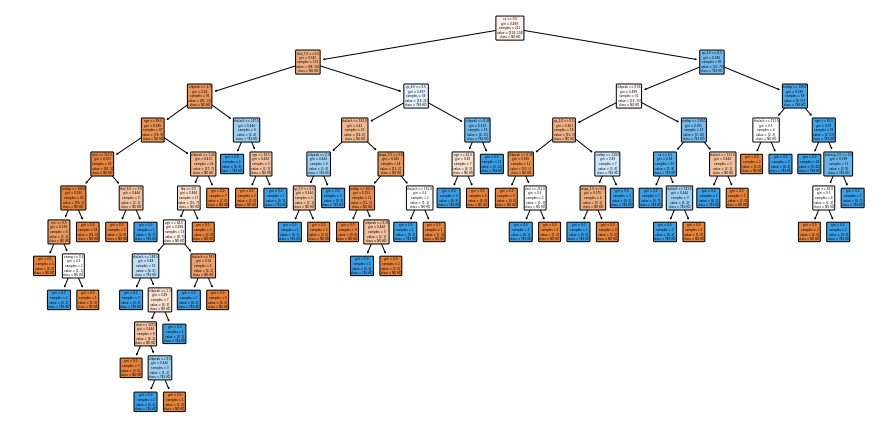

In [225]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
        filled=True,
        rounded=True,
        class_names=["NO HD","YES HD"],
        feature_names=X_encoded.columns);

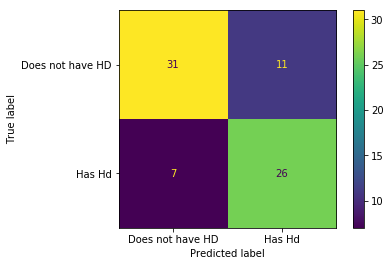

In [226]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels=["Does not have HD","Has Hd"])

In [227]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train) #Determine values for alpha
ccp_alphas=path.ccp_alphas #Extract values for alpha
ccp_alphas=ccp_alphas[:-1]#Exclude the maximum value for alpha
clf_dts=[]
#creat a dtree for each value of alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)
    

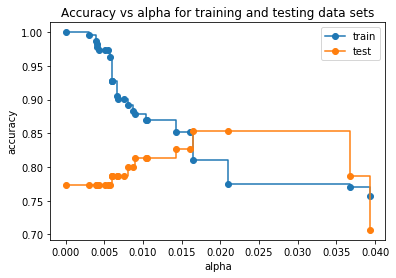

In [228]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]
fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

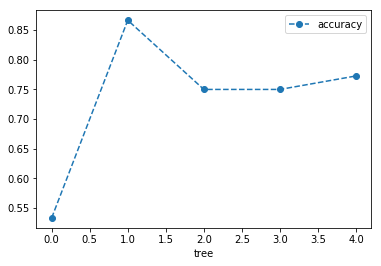

In [229]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
df=pd.DataFrame(data={'tree': range(5),'accuracy': scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [230]:
#The graph shows that using the same alpha for differnt datasets doesn't yield optimal results.
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

In [231]:
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

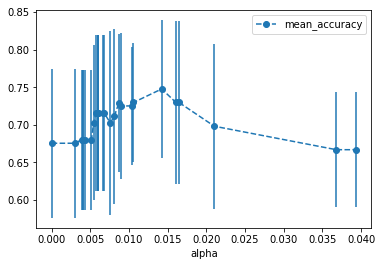

In [232]:
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [233]:
alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [234]:
ideal_ccp_alpha =alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.015)]['alpha']

In [237]:
ideal_ccp_alpha

0.014224751066856332

In [238]:
ideal_ccp_alpha=float(ideal_ccp_alpha)

In [239]:
ideal_ccp_alpha

0.014224751066856332

In [241]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

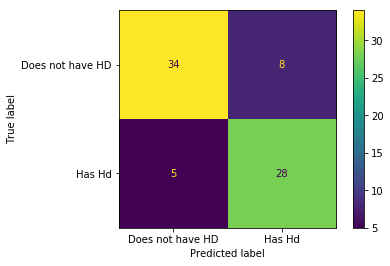

In [242]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=["Does not have HD","Has Hd"])

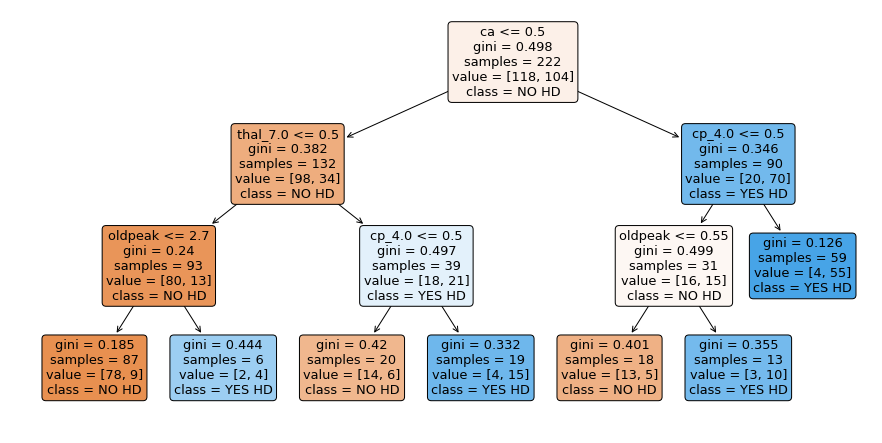

In [243]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
        filled=True,
        rounded=True,
        class_names=["NO HD","YES HD"],
        feature_names=X_encoded.columns);